<a href="https://colab.research.google.com/github/srfinley/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [3]:
pd.__version__

'0.23.4'

In [18]:
!pip install pandas==0.23.4

     |████████████████████████████████| 8.9MB 5.1MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


In [2]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/srfinley/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv')

df.head()

,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [4]:
df.describe()

,Unnamed: 0,age,weight,exercise_time
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,599.500000,48.396667,153.540833,134.910833
std,346.554469,18.166802,35.132182,85.548895
min,0.000000,18.000000,100.000000,0.000000
25%,299.750000,33.000000,125.000000,65.000000
50%,599.500000,48.000000,149.000000,122.000000
75%,899.250000,64.000000,180.250000,206.000000
max,1199.000000,80.000000,246.000000,300.000000


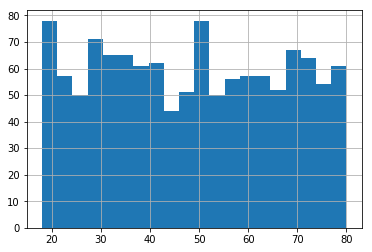

In [5]:
#histograms

df['age'].hist(bins=20);
#age is distributed fairly flatly between 18 and 80; there's variation, but nothing systematic

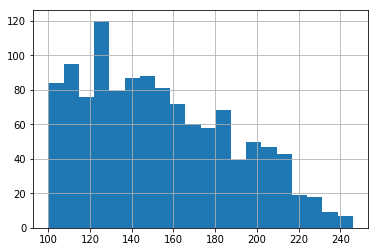

In [6]:
df['weight'].hist(bins=20);
#fairly steady dropoff past 160 pounds
#since the data only includes adults, we see none of the leftmost part of the presumed normal distribution

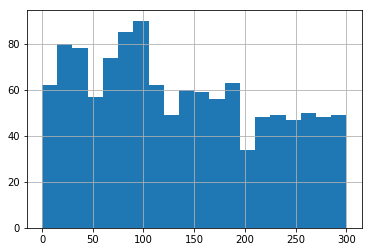

In [7]:
df['exercise_time'].hist(bins=20);
#again, somewhat chaotically flat distribution; drops off a bit past 200 minutes

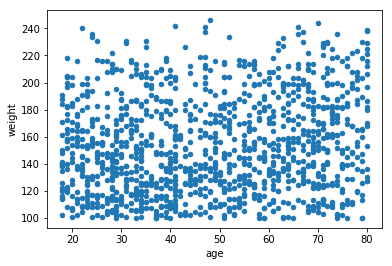

In [8]:
df.plot.scatter('age','weight');
#nothing really jumps out here

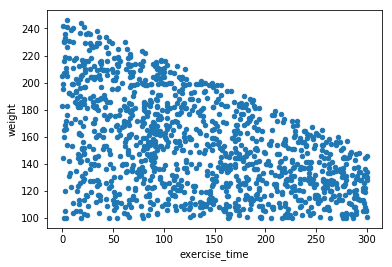

In [9]:
df.plot.scatter('exercise_time', 'weight');
#this one's a lot more interesting! 
#it looks like exercise time puts a hard cap on weight, 
#but any imagined causation could easily be reversed, 
#e.g., if a high weight makes long-duration exercise prohibitively unpleasant

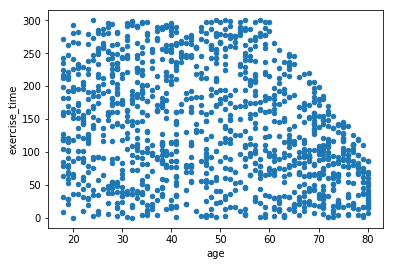

In [11]:
df.plot.scatter('age','exercise_time');
#the same kind of hard slope in the weight/exercise plot is visible here as well
#could be something like "past about sixty, there exists a fairly hard endurance cap that lowers with age"
#or: "old people who exercise too hard die on the treadmill"
#at all ages, distribution between the maximum (capped or uncapped) and 0 seems pretty even

In [91]:
age_bins = pd.cut(df['age'], 6) #corresponds to about six decades represented
weight_bins = pd.cut(df['weight'], 5)
exercise_bins = pd.cut(df['exercise_time'], 6)

pd.crosstab(age_bins,weight_bins)
#at each age, a plurality of subjects are in the first or second weight category
#aside from the oldest plurality, which is in the third weight category

weight,"(99.854, 129.2]","(129.2, 158.4]","(158.4, 187.6]","(187.6, 216.8]","(216.8, 246.0]"
age,,,,,
"(17.938, 28.333]",66,71,37,28,7
"(28.333, 38.667]",85,54,45,28,5
"(38.667, 49.0]",68,59,43,22,8
"(49.0, 59.333]",67,49,38,28,2
"(59.333, 69.667]",40,61,40,41,10
"(69.667, 80.0]",49,41,55,32,21


In [75]:
pd.crosstab(age_bins,weight_bins,normalize='columns')
#pecentage membership in the highest weight categories roughly increases with age
#but like..... very roughly
#maybe not really at all, aside from the oldest, fattest group, which has a spike in membership
#when will I learn how to determine which maybe-trends are statistically significant

weight,"(99.854, 129.2]","(129.2, 158.4]","(158.4, 187.6]","(187.6, 216.8]","(216.8, 246.0]"
age,,,,,
"(17.938, 28.333]",0.176000,0.211940,0.143411,0.156425,0.132075
"(28.333, 38.667]",0.226667,0.161194,0.174419,0.156425,0.094340
"(38.667, 49.0]",0.181333,0.176119,0.166667,0.122905,0.150943
"(49.0, 59.333]",0.178667,0.146269,0.147287,0.156425,0.037736
"(59.333, 69.667]",0.106667,0.182090,0.155039,0.229050,0.188679
"(69.667, 80.0]",0.130667,0.122388,0.213178,0.178771,0.396226


In [20]:
pd.crosstab(exercise_bins,weight_bins)
#you can see the "ceiling" in the zeroes on the lower right corner
#increasing weight categories have distinct descending modal exercise values (with mostly clear dropoffs on either side)
#this wasn't clear from looking at the scatterplot!

weight,"(99.854, 129.2]","(129.2, 158.4]","(158.4, 187.6]","(187.6, 216.8]","(216.8, 246.0]"
exercise_time,,,,,
"(-0.3, 50.0]",44,39,52,66,40
"(50.0, 100.0]",48,64,75,64,13
"(100.0, 150.0]",60,40,54,40,0
"(150.0, 200.0]",65,67,49,9,0
"(200.0, 250.0]",67,64,24,0,0
"(250.0, 300.0]",91,61,4,0,0


In [89]:
pd.crosstab(exercise_bins,age_bins,normalize='columns')

age,"(17.938, 28.333]","(28.333, 38.667]","(38.667, 49.0]","(49.0, 59.333]","(59.333, 69.667]","(69.667, 80.0]"
exercise_time,,,,,,
"(-0.3, 50.0]",0.138756,0.221198,0.135,0.141304,0.229167,0.338384
"(50.0, 100.0]",0.167464,0.147465,0.200,0.163043,0.276042,0.373737
"(100.0, 150.0]",0.157895,0.133641,0.125,0.157609,0.171875,0.227273
"(150.0, 200.0]",0.215311,0.193548,0.130,0.157609,0.187500,0.060606
"(200.0, 250.0]",0.186603,0.156682,0.180,0.130435,0.114583,0.000000
"(250.0, 300.0]",0.133971,0.147465,0.230,0.250000,0.020833,0.000000


In [78]:
pd.crosstab(weight_bins, [exercise_bins, age_bins],normalize='columns')
#too many bins to look at...

exercise_time       (-0.3, 50.0]       ...          (250.0, 300.0]
age             (17.938, 28.333]       ...        (59.333, 69.667]
weight                                 ...                        
(99.854, 129.2]         0.206897       ...                    0.25
(129.2, 158.4]          0.103448       ...                    0.75
(158.4, 187.6]          0.137931       ...                    0.00
(187.6, 216.8]          0.310345       ...                    0.00
(216.8, 246.0]          0.241379       ...                    0.00

[5 rows x 34 columns]

In [35]:
age_bins2 = pd.cut(df['age'], 2)
weight_bins2 = pd.cut(df['weight'], 2)
exercise_bins2 = pd.cut(df['exercise_time'], 2)

pd.crosstab(weight_bins2, [exercise_bins2, age_bins], normalize='columns')
#at lower exercise times across all ages, it's about 60/40 whether you'll be in the high or low weight category
#at high exercise times it's more like 90/10, but again, fairly consistent across age categories
#numbers in the high-exercise high-weight quadrant are very low in general

exercise_time      (-0.3, 150.0]      ...       (150.0, 300.0]
age             (17.938, 28.333]      ...       (69.667, 80.0]
weight                                ...                     
(99.854, 173.0]         0.556701      ...                  1.0
(173.0, 246.0]          0.443299      ...                  0.0

[2 rows x 12 columns]

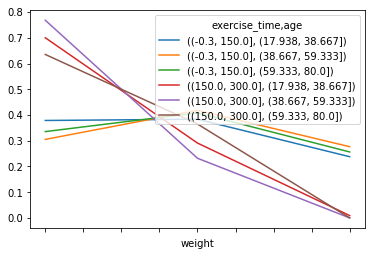

In [66]:
age_bins3 = pd.cut(df['age'], 3)
weight_bins3 = pd.cut(df['weight'], 3)
exercise_bins3 = pd.cut(df['exercise_time'], 3)

crosstab = pd.crosstab(weight_bins3, [exercise_bins2, age_bins3], normalize='columns')
crosstab.plot();
#the two difference exercise bin clusters have distinct shapes here, with age largely irrelevant
#I'd summarize it as: for those who exercise little, exercise and weight are unrelated
#for those who exercise more, increased exercise leads to decreased chance of high weight

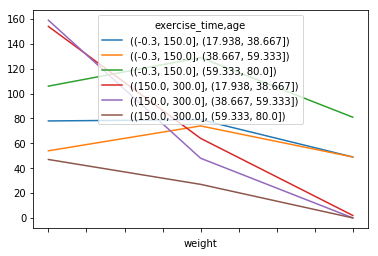

In [79]:
crosstab = pd.crosstab(weight_bins3, [exercise_bins2, age_bins3])
crosstab.plot();
#this looks substantially different from the non-normalized one and I don't know how to interpret that
#I guess the general shapes of the curves are the same

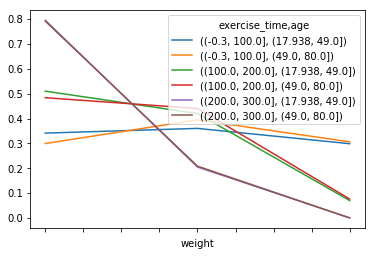

In [68]:
crosstab = pd.crosstab(weight_bins3, [exercise_bins3, age_bins2], normalize='columns')
crosstab.plot();
#I think this affirms the "the more you exercise, the more your weight is related to exercise" interpretation
#which is really just another way of saying the same thing the weight/exercise scatterplot showed;
#the full range of weights exists at 0 exercise and the range narrows as exercise increases

In [0]:
import matplotlib.pyplot as plt

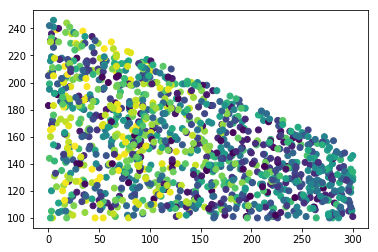

In [87]:
plot = plt.scatter(df['exercise_time'],df['weight'],c=df['age']);
#x axis is exercise time, y axis is weight, color is age

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
- all are basically continuous
2.  What are the relationships between the variables?
- exercise time and weight are somewhat related. The higher the exercise time, the narrower the range of weight, creating a "missing corner" where high-exercise high-weight data points would go
- age and exercise time have a smaller missing corner but little relationship beyond that
- age and weight are largely unrelated, except at the oldest, fattest extreme
3.  Which relationships are "real", and which spurious?
- Exercise/weight relationship seems pretty robust for higher exercise values. Maybe the age/exercise relationship is an artifact? I honestly can't tell and I'm not getting anywhere further tonight.

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)